## Visualize difference between log-mel spectrogram and kaldi fbank output

In [63]:
wav_file = "/home/tlips/Documents/ast/egs/robomic/data/icra2025-v0/3_M6x14/mic_2025-02-18[10].wav"


In [64]:
import torchaudio

# get waveform

waveform, sample_freq = torchaudio.load(wav_file)

print(sample_freq)

20220


In [65]:

# create mel log spectrogram
def create_mel_spectrogram(waveform):
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=sample_freq,
        n_fft=400,
        win_length=400,
        hop_length=160,
        n_mels=80,
        center=False,
        pad_mode='reflect',
        power=2.0,
    )(waveform)
    mel_spectrogram = torchaudio.transforms.AmplitudeToDB()(mel_spectrogram)
    return mel_spectrogram
    


In [87]:
def compute_fbank_from_mel_spectrogram(waveform, sample_rate, n_fft=400, hop_length=100, n_mels=128):
    """
    Computes fbank features using the mel-log spectrogram method in torchaudio.

    Args:
        waveform (torch.Tensor): The audio waveform (1D tensor).
        sample_rate (int): The sample rate of the audio.
        n_fft (int): The length of the FFT window.
        hop_length (int): The number of samples between successive FFT windows.
        n_mels (int): The number of Mel filterbanks.

    Returns:
        torch.Tensor: The fbank features (2D tensor: time x frequency).
    """

    # 1. Compute the Mel spectrogram
    mel_spectrogram_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=400, win_length=400, hop_length=160, n_mels=64, normalized=False)
    mel_spectrogram = mel_spectrogram_transform(waveform)

    # 2. Convert to dB (log-Mel spectrogram)
    log_mel_spectrogram = torchaudio.transforms.AmplitudeToDB()(mel_spectrogram)

    return log_mel_spectrogram


In [88]:
# create fbank

def create_fbank(waveform,sample_freq):
    x = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sample_freq, use_energy=False,
                                                  window_type='hanning', num_mel_bins=64, dither=0.0, frame_shift=10)
    
    return x

torch.Size([1163, 64])
torch.Size([1, 64, 1472])


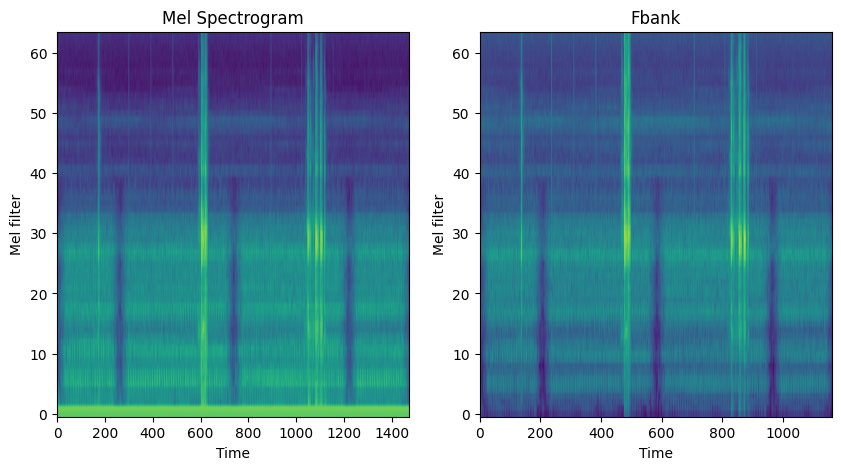

In [89]:
fbank = create_fbank(waveform,sample_freq)
mel_spectrogram = compute_fbank_from_mel_spectrogram(waveform, sample_freq)
print(fbank.shape)
print(mel_spectrogram.shape)

# transpose to fbank
fbank = fbank.transpose(0,1)

# plot side by side
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torchaudio.compliance.kaldi as kaldi
import torch

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mel_spectrogram[0].numpy(), aspect='auto', origin='lower')
axs[0].set_title('Mel Spectrogram')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Mel filter')
axs[1].imshow(fbank.numpy(), aspect='auto', origin='lower')
axs[1].set_title('Fbank')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Mel filter')

plt.show()

## Visualize dataset output 

In [94]:
# create dataset and dataloader

#add to path "../../src" 
import sys
sys.path.append("../../src")
from dataloader import AudiosetDataset

In [116]:
    audio_conf = {'num_mel_bins': 128, 'target_length': 1100, 'freqm': 0, 'timem': 0, 'mixup': 0.0, 'mean': -0.12, 'std': 2.039, 'mode': 'train', 'dataset': 'blabla'}

    label_csv = "/home/tlips/Documents/ast/egs/robomic/data/robomic_categories.csv"
    datafile= "/home/tlips/Documents/ast/egs/robomic/data/icra2025-v0/robomic_train_mic.json"
    dataset = AudiosetDataset(datafile, label_csv=label_csv, audio_conf=audio_conf)    

---------------the train dataloader---------------
now using following mask: 0 freq, 0 time
now using mix-up with rate 0.000000
now process blabla
use dataset mean -0.120 and std 2.039 to normalize the input.
number of classes is 2


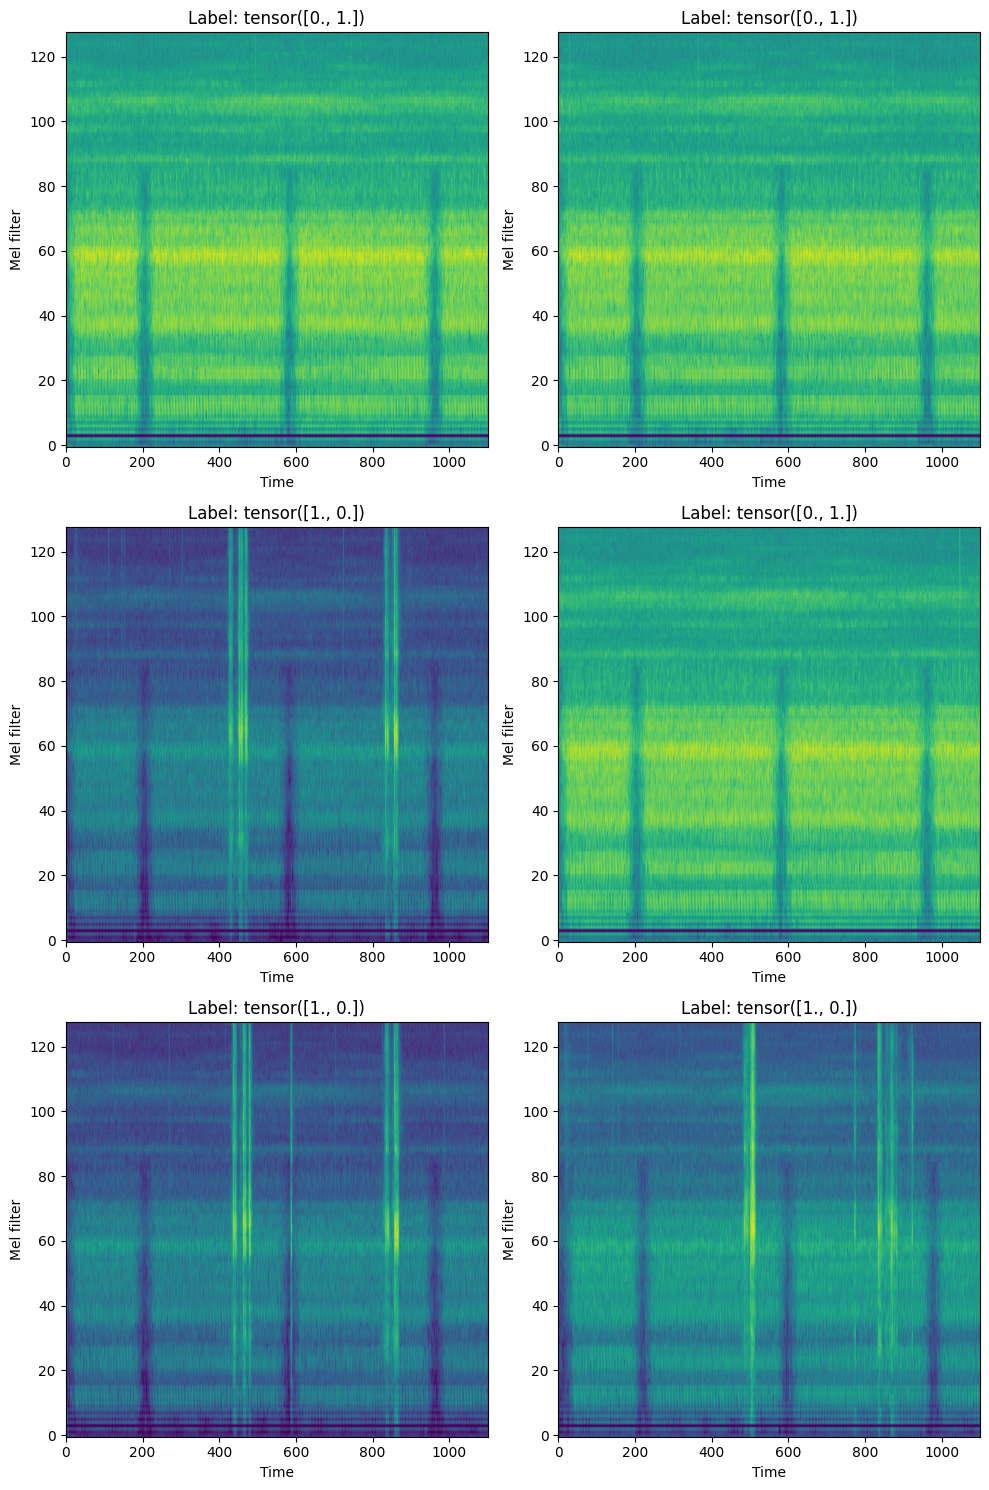

In [142]:
# visualize 6 samples in a 3x2 layout

import matplotlib.pyplot as plt
import numpy as np
import random

N = 6
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

for i in range(N):
    idx = random.randint(0, len(dataset) - 1)
    fbank, label = dataset[idx]
    # transpose to fbank
    fbank = fbank.transpose(0, 1)
    axs[i].imshow(fbank.numpy(), aspect='auto', origin='lower')
    axs[i].set_title(f'Label: {label}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Mel filter')

plt.tight_layout()
plt.show()

In [2]:
import scipy.stats as st

def exact_binomial_confidence_interval(n, k, alpha=0.05):
    """Calculates exact binomial confidence interval for binary classification accuracy."""
    lower = st.binom.ppf(alpha / 2, n, k / n)  # Use current accuracy as estimate for p
    upper = st.binom.ppf(1 - alpha / 2, n, k / n)
    return lower / n, upper / n

n = 8  # Number of test samples
k = n*0.8  # Number of correct classifications
alpha = 0.05

lower, upper = exact_binomial_confidence_interval(n, k, alpha)
print(f"Exact 95% Confidence Interval: [{lower}, {upper}]")



Exact 95% Confidence Interval: [0.5, 1.0]


## visualize variation between audio fragments

In [138]:
b1,l1 = dataset[0]
b2,l2 = dataset[1]

assert torch.all(b1 == b1)

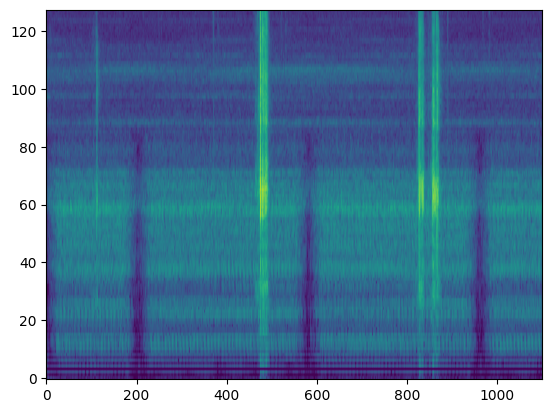

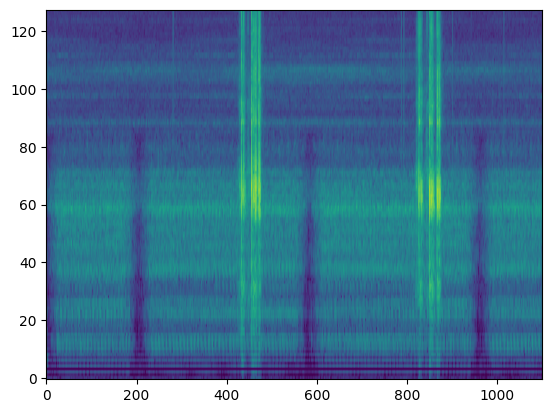

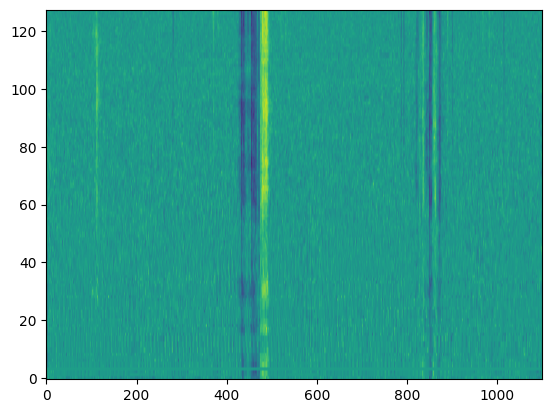

In [139]:
diff = b1-b2
# plot difference
plt.imshow(b1.transpose(0,1).numpy(), aspect='auto', origin='lower')
plt.show()
plt.imshow(b2.transpose(0,1).numpy(), aspect='auto', origin='lower')
plt.show()
plt.imshow(diff.transpose(0,1).numpy(), aspect='auto', origin='lower')
plt.show()